In [1]:
# magic lines that avoid re-start
%load_ext autoreload
%autoreload 2

In [2]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal

In [3]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *

In [4]:
fs=17;
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)

In [5]:
# Reload all scans in this round! 
Index = np.arange(1,6+1) 
# C:\Users\rl1120\OneDrive - Imperial College London\SimDataSave\P3R13
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R13/Paper/'
Targets = ["ManyCycAge_1C_Dint=5e_19",]
Scan_Num = [4] 
# 1-single;                 2-single consumed refill; 
# 3-double consumed refill; 4-double no consumed no refill;
Round230420 = {}
for target,scan_num in zip(Targets,Scan_Num):
    Round230420[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        Round230420[target][str(scan)]={}
        try:
            Round230420[target][str(scan)] = loadmat( 
            BasicPath  +   target+ "/" + str(scan) + "th Scan/" 
            + str(scan)+ "th Scan-for_AGE_only.mat")
        except:
            print(f"Nothing in {target}, Scan {scan}")

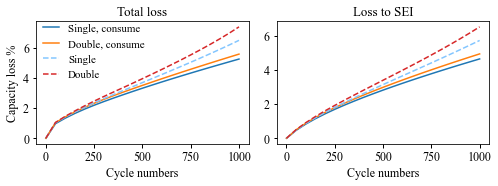

In [48]:
fs=12;
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)
target = "ManyCycAge_1C_Dint=5e_19"; dpi=1000
Colors = ['#1f77b4','#ff7f0e',"#83C6FF",'#d62728',];Markers   = ["none","none","none","none"];
LS = ['-','-','--','--'];

Labels = ["Single, consume","Double, consume","Single","Double",] 
Scans = [2,3,1,4,] # [1,4,2,3]  # np.arange(4)+1;

fig, axs = plt.subplots(1,2, figsize=(18/2.54,7/2.54),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    cap_temp = Round230420[target][str(Scan_i)]["Discharge capacity [A.h]"][0]
    axs[0].plot(
        Round230420[target][str(Scan_i)]["Full_cycle"][0], 
        (1-cap_temp/cap_temp[0])*100,
        color=Colors[k],linestyle=LS[k],  label=Labels[k])   # marker=Markers[k],
    axs[0].set_ylabel("Capacity loss %",   fontdict={'family':'Times New Roman','size':fs})
    axs[0].set_title("Total loss",   fontdict={'family':'Times New Roman','size':fs+1})
    cap_sei = Round230420[target][str(Scan_i)]["CDend Loss of capacity to SEI [A.h]"][0]
    axs[1].plot(
        Round230420[target][str(Scan_i)]["Full_cycle"][0], 
        cap_sei / cap_temp[0] * 100 , 
        color=Colors[k],linestyle=LS[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'Times New Roman','size':fs})
    axs[1].set_title("Loss to SEI",   fontdict={'family':'Times New Roman','size':fs+1})

    """ axs[2].plot(
        Round230420[target][str(Scan_i)]["Full_cycle"][0], 
        Round230420[target][str(Scan_i)]["CDend Local ECM resistance [Ohm]"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'Times New Roman','size':fs})
    axs[2].set_title("Local ECM resistance",   fontdict={'family':'Times New Roman','size':fs+1}) """
    for i in range(0,2):
        #axs[i].set_ylim(-0.3,17.5); 
        #axs[i].set_xlim(-0.3,1500); 
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'Times New Roman','size':fs})
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[0].legend(
        prop={'family':'Times New Roman','size':fs-1},
        loc='upper left',frameon=False,markerscale=0.,borderpad=0.1,
        bbox_to_anchor=(0, 1.04),
        handlelength=1.5,columnspacing=0.4)

BasicPath_save = "D:/OneDrive - Imperial College London/SimDataSave/P3R13/Paper/"  #'D:/OneDrive - Imperial College London/SimDataSave/P3R13/'; 
target_save  = 'ManyCycAge_1C_Dint=5e_19/' 

plt.savefig(BasicPath_save +   target_save+ "Cap loss in percentage Single_Double_Both_Dx.png", dpi=dpi)

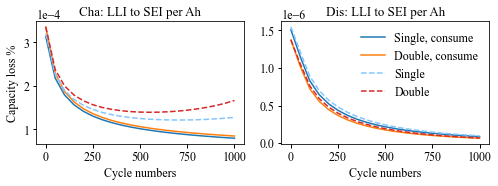

In [56]:
fs=12;
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)
target = "ManyCycAge_1C_Dint=5e_19"; dpi=1000
Colors = ['#1f77b4','#ff7f0e',"#83C6FF",'#d62728',];Markers   = ["none","none","none","none"];
LS = ['-','-','--','--'];

Labels = ["Single, consume","Double, consume","Single","Double",] 
Scans = [2,3,1,4,] # [1,4,2,3]  # np.arange(4)+1;

fig, axs = plt.subplots(1,2, figsize=(18/2.54,7/2.54),tight_layout=True)
for k,Scan_i in enumerate(Scans):
    cap_temp = Round230420[target][str(Scan_i)]["Discharge capacity [A.h]"][0]
    axs[0].plot(
        Round230420[target][str(Scan_i)]["Full_cycle"][0], 
        Round230420[target][str(Scan_i)]["Cha LLI to SEI per Ah"][0],
        color=Colors[k],linestyle=LS[k],  label=Labels[k])   # marker=Markers[k],
    axs[0].set_ylabel("Capacity loss %",   fontdict={'family':'Times New Roman','size':fs})
    axs[0].set_title("Cha: LLI to SEI per Ah",   fontdict={'family':'Times New Roman','size':fs+1})
    cap_sei = Round230420[target][str(Scan_i)]["CDend Loss of capacity to SEI [A.h]"][0]
    axs[1].plot(
        Round230420[target][str(Scan_i)]["Full_cycle"][0], 
        Round230420[target][str(Scan_i)]["Dis LLI to SEI per Ah"][0], 
        color=Colors[k],linestyle=LS[k],  label=Labels[k])
    #axs[1].set_ylabel("Capacity [A.h]",   fontdict={'family':'Times New Roman','size':fs})
    axs[1].set_title("Dis: LLI to SEI per Ah",   fontdict={'family':'Times New Roman','size':fs+1})

    """ axs[2].plot(
        Round230420[target][str(Scan_i)]["Full_cycle"][0], 
        Round230420[target][str(Scan_i)]["CDend Local ECM resistance [Ohm]"][0], 
        color=Colors[k],marker=Markers[k],linestyle=Linestyles[k],  label=Labels[k])
    axs[2].set_ylabel("Resistance [Ohm]",   fontdict={'family':'Times New Roman','size':fs})
    axs[2].set_title("Local ECM resistance",   fontdict={'family':'Times New Roman','size':fs+1}) """
    for i in range(0,2):
        #axs[i].set_ylim(-0.3,17.5); 
        #axs[i].set_xlim(-0.3,1500); 
        axs[i].set_xlabel("Cycle numbers",   fontdict={'family':'Times New Roman','size':fs})
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1)
    axs[0].ticklabel_format(axis='y', style='sci', scilimits=(-1e-2,1e-2))
    axs[1].legend(prop={'family':'Times New Roman','size':fs},loc='best',frameon=False)

BasicPath_save = "D:/OneDrive - Imperial College London/SimDataSave/P3R13/Paper/"  #'D:/OneDrive - Imperial College London/SimDataSave/P3R13/'; 
target_save  = 'ManyCycAge_1C_Dint=5e_19/' 

plt.savefig(BasicPath_save +   target_save+ "LLI percentage.png", dpi=dpi)